In [5]:
import sys
sys.path.append('../../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.io import mmread
from scipy import sparse as sp
import freeqsw as qsw
import h5py


# Aim:

Exciton transport in the FMO, and other photosythetic complexes has recieved a large amount of attnetion due to them exhibiting measurable inter-site coherences. This is exciting becuase of the possibility that these quantum effects may play a role in the transport efficiency.

Quantum Walks based on the Redfiled (?) master equation have been used to study the dynamics of quantum transport in the FMO complex in detailed. It has also been observed that a simplified QSW model results n similar dynamics.

In these studies the FMO complex is generally modelled as a 7 node network with 7 edges. Shown in Figure ?, transport is typically modeled as starting from an exciation at site 6, followed by trapping at site 3.The quantum significance of this configuration has been considered, for example, wether not not the network is effectively perfoming a 'Gover's search' algorithm. While the answer to that question was shown to be a, rather unexciting, 'no', the significance of the topological configuration of the FMO complex remains an open question.

Such a question possess a challenge as the search space for graphs consisting of 7 nodes is exceedingly large, if all configurations ranging from a minimal number of cnnections (a line graph), to a maximum number of connections (a complete graph) are considered. This study thus limits the range of topological consideration to a configurations consisting of 7 nodes and 7 edges. An additional restrinction fixes the distance between the absorption site 6 and the emission site 3 to 4 nodes. These restrictions mean that transport throught these networks may be considered as a function of topology alone.

Undirected graphs were generated creating the set of all upper triangular matrices with 7 non-zero entires. These were filltered for solutions with an inter-node distance of 4 between nodes 3 and 6 and then filtered again for isomorhic uniqueness using methods for graph analysis provided by mathematica. This resulted in a total sample set of 32 graphs.

QSW simulation on these graph topologies was carried out using QSW_MPI. With t1 = 0, t2 = 2000, gamma = 1, q = 2^15 and omega ranging from 0 to 1 in steps of 0.01. For each omega the time integrated populations and coherences were recorded, and the time taken for 'complete' arrival of the walker to the sink node attached to site 6. 'Complete' arrival is defined as being the point at which the sink site reaches a steady population which, based on the validation results shown in Section ??, Figure ??, was defined as being a difference of less than ?? between subsequent time steps. An expection to this methodology occurs in the case of omega = 0 for graphs ?? for which t2 = 32000 (?) and q = (?), as a longer similuation time was required to reach a steady state solution for the trap site. 




In [10]:
results_df = pd.read_csv('Application_1_All_Results.csv',encoding = "ISO-8859-1")

In [11]:
results_df.head()

,graph,ID,omega,integrated_populations,int_pop_t_normalized,integrated_coherences,int_coh_normalized,final_sink_pop,time,Full Arrival,t2_population,simulation_time
0,isomorphic_graphs/7.mtx,7,0.0,1339.472222,0.669736,1193.179462,0.596590,0.333333,1774.536133,F,1.0,2000
1,isomorphic_graphs/31.mtx,31,0.0,1015.500000,0.507750,1377.756308,0.688878,0.500000,1951.660156,F,1.0,2000
2,isomorphic_graphs/32.mtx,32,0.0,1002.625000,0.501313,2068.227251,1.034114,0.500000,177.734375,F,1.0,2000
3,isomorphic_graphs/13.mtx,13,0.0,1006.250000,0.503125,553.897782,0.276949,0.500000,1048.828125,F,1.0,2000
4,isomorphic_graphs/24.mtx,24,0.0,1006.250000,0.503125,1282.041424,0.641021,0.500000,378.051758,F,1.0,2000


Figure 1 Steady State Sink Population, omega = 0


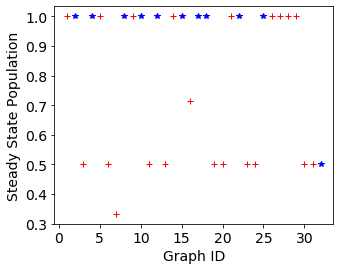

In [14]:
results_0 = results_df.loc[results_df['omega']==0]
font = 14
no_overlap = np.array([1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0])
marker = []
for over in no_overlap:
    if over != 0:
        marker.append('r+')
    else:
        marker.append('b*')
#marker[31]='r+' # What is going on Here?
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)

IDs = results_0['ID'].values
pop = results_0['final_sink_pop'].values

x = np.argsort(IDs)
IDs = IDs[x]
pop = pop[x]

for i in range(len(marker)):
    ax.plot(IDs[i], pop[i], marker[i])
plt.yticks(fontsize=font)
plt.xticks(fontsize=font)        
plt.ylabel('Steady State Population',fontsize=font)
plt.xlabel('Graph ID',fontsize=font)
#plt.savefig("Scaling.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)
print('Figure 1 Steady State Sink Population, omega = 0')
plt.show()

Figure 1 shows the steady state sink population for the graph set at $\omega = 0$. For a number of cases the equillibrium value is less than one. It has previously been demonstrated that this can occur if $\mathbf{H}$ has eigenstates which do not overlap with vertices connected to a sink. However, as shown, this property is correlative rather than deterministic. In the case of graph 32, a non-zero probability of network retension is observed for despite its $\mathbf{H}$ containing no non-overlapping eigenstates. Noteably, this is the circle graph, as shown in Figure 2, and the only circulant graph in the sample set. For the set of graphs with a steady state sink population less than 1, additional walks were carried out with $\Theta = 0.1$ and $\Theta = 0.01$. This decrease resulted in a larger equilibrium time but the steady state sink population remained unchanged in each case.

Figure 2 Graph 32


/home/edric/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


(-1.0413844965218169,
 1.1378568459754748,
 -1.1040091147123585,
 1.1006165475825596)

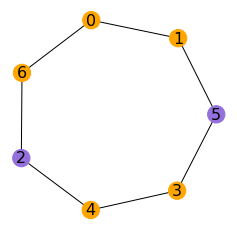

In [15]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
graph_max = nx.from_scipy_sparse_matrix(sp.csr_matrix(mmread('isomorphic_graphs/32.mtx')))
print("Figure 2 Graph 32")
color_map = ['orange', 'orange', 'mediumpurple', 'orange', 'orange', 'mediumpurple', 'orange']
nx.draw_networkx(graph_max, with_labels = True, node_color = color_map, font_size=16)
plt.axis('off')
#plt.savefig("Scaling.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)


No handles with labels found to put in legend.


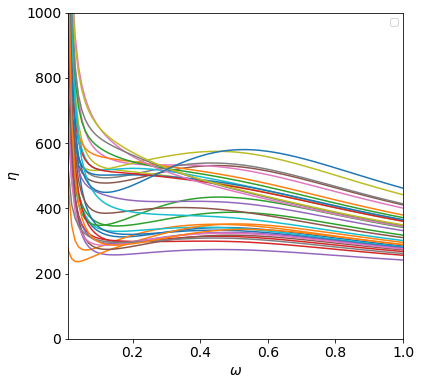

In [24]:
font = 14
files = np.arange(1,33,1) 
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
h = 2000/float(16384)
ts = np.arange(0,2000 + h, h)

for file in files:
    ax.plot(results_df.loc[results_df['ID']==file]['omega'],results_df.loc[results_df['ID']==file]['time'])
#ax.set_scale('log')
#ax.set_yscale('log')
plt.legend()
ax.set_ylim(0.0,1000)
ax.set_xlim(0.01,1)
plt.yticks(fontsize=font)
plt.xticks(fontsize=font)        
plt.xlabel(r'$\omega$',fontsize=font)
plt.ylabel(r'$\eta$',fontsize=font)
print()
plt.show()

For $\omega >0$ $\eta$ is finite due to the scattering induced by the Linblad operators providing a transport mechanism indepedent of the inter-vertex coherence. Figure ?? provides an overview of $\eta$ as a function of $\omega$. A high degree of varience is observed for all $\omega$ and the ordering of $\eta$ is not constant for $\omega < \sim 0.6$. 

In [200]:
omegas = np.arange(0.01,1.01,0.01)

for omega in omegas: 
    omega_results = results_df.loc[results_df['omega']==round(omega,2)]
    min_time = np.min(omega_results['time'])
    max_time = np.max(omega_results['time'])
    min_ID = omega_results[omega_results['time']==min_time]['ID'].values
    max_ID = omega_results[omega_results['time']==max_time]['ID'].values
    print(min_ID, max_ID, round(100*(max_time-min_time)/max_time,2))

[12] [7] 84.65
[12] [27] 78.06
[12] [27] 74.45
[12] [27] 71.68
[12] [27] 69.3
[12] [27] 67.15
[12] [27] 65.18
[12] [27] 63.36
[12] [27] 61.63
[12] [27] 60.01
[5] [29] 59.2
[5] [29] 58.79
[5] [29] 58.35
[5] [29] 57.85
[5] [29] 57.35
[5] [29] 56.78
[5] [29] 56.23
[5] [29] 55.65
[5] [29] 55.07
[5] [29] 54.5
[5] [29] 53.9
[5] [29] 53.32
[5] [29] 52.74
[5] [29] 52.16
[5] [9] 51.91
[5] [9] 51.94
[5] [9] 51.96
[5] [9] 52.01
[5] [9] 52.04
[5] [9] 52.06
[5] [9] 52.11
[5] [9] 52.12
[5] [9] 52.17
[5] [9] 52.19
[5] [9] 52.23
[5] [9] 52.25
[5] [9] 52.29
[5] [9] 52.31
[5] [9] 52.33
[5] [9] 52.35
[5] [9] 52.37
[5] [9] 52.37
[5] [9] 52.38
[5] [9] 52.38
[5] [9] 52.39
[5] [9] 52.38
[5] [31] 52.49
[5] [31] 52.61
[5] [31] 52.72
[5] [31] 52.8
[5] [31] 52.9
[5] [31] 52.96
[5] [31] 53.01
[5] [31] 53.06
[5] [31] 53.1
[5] [31] 53.12
[5] [31] 53.13
[5] [31] 53.12
[5] [31] 53.1
[5] [31] 53.1
[5] [31] 53.07
[5] [31] 53.03
[5] [31] 52.99
[5] [31] 52.93
[5] [31] 52.87
[5] [31] 52.78
[5] [31] 52.72
[5] [31] 52.63
[5

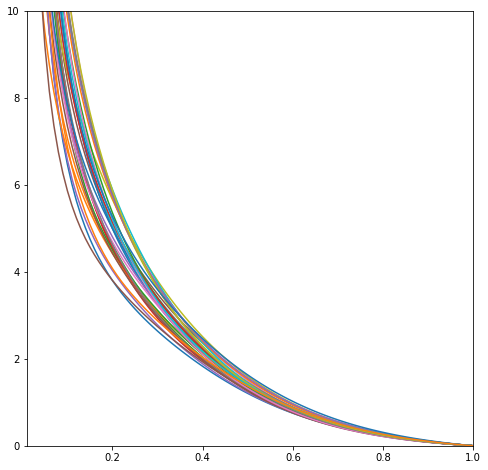

In [203]:
files = np.arange(1,33,1) 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
h = 2000/float(16384)
ts = np.arange(0,2000 + h, h)

for file in files:
    ax.plot(results_df.loc[results_df['ID']==file]['omega'],results_df.loc[results_df['ID']==file]['integrated_coherences'])
#ax.set_scale('log')
#ax.set_yscale('log')
ax.set_ylim(0.0,10)
ax.set_xlim(0.01,1)
plt.show()

In [212]:
omegas = np.arange(0.01,1.0,0.01)

for omega in omegas: 
    omega_results = results_df.loc[results_df['omega']==round(omega,2)]
    min_coh = np.min(omega_results['integrated_coherences'])
    max_coh = np.max(omega_results['integrated_coherences'])
    coh_min_ID = omega_results[omega_results['integrated_coherences']==min_coh]['ID'].values
    coh_max_ID = omega_results[omega_results['integrated_coherences']==max_coh]['ID'].values
    min_time = np.min(omega_results['time'])
    max_time = np.max(omega_results['time'])
    time_min_ID = omega_results[omega_results['time']==min_time]['ID'].values
    time_max_ID = omega_results[omega_results['time']==max_time]['ID'].values
    print(time_min_ID, time_max_ID, round(100*(max_time-min_time)/max_time,2),coh_min_ID, coh_max_ID, round(100*(max_coh-min_coh)/max_coh,2))

[12] [7] 84.65 [12] [7] 70.28
[12] [27] 78.06 [12] [7] 59.43
[12] [27] 74.45 [12] [7] 53.26
[12] [27] 71.68 [12] [7] 48.97
[12] [27] 69.3 [16] [7] 47.39
[12] [27] 67.15 [16] [7] 46.9
[12] [27] 65.18 [16] [7] 46.46
[12] [27] 63.36 [16] [7] 45.95
[12] [27] 61.63 [16] [7] 45.32
[12] [27] 60.01 [16] [7] 44.59
[5] [29] 59.2 [16] [7] 43.78
[5] [29] 58.79 [16] [29] 43.0
[5] [29] 58.35 [16] [29] 42.19
[5] [29] 57.85 [16] [29] 41.33
[5] [29] 57.35 [16] [29] 40.4
[5] [29] 56.78 [16] [29] 39.41
[5] [29] 56.23 [16] [29] 38.4
[5] [29] 55.65 [16] [29] 37.38
[5] [29] 55.07 [16] [29] 36.34
[5] [29] 54.5 [1] [20] 35.52
[5] [29] 53.9 [1] [20] 35.13
[5] [29] 53.32 [1] [20] 34.69
[5] [29] 52.74 [1] [20] 34.2
[5] [29] 52.16 [1] [20] 33.67
[5] [9] 51.91 [1] [20] 33.11
[5] [9] 51.94 [1] [20] 32.51
[5] [9] 51.96 [1] [20] 31.87
[5] [9] 52.01 [1] [9] 31.24
[5] [9] 52.04 [1] [9] 30.89
[5] [9] 52.06 [1] [9] 30.54
[5] [9] 52.11 [1] [9] 30.18
[5] [9] 52.12 [1] [9] 29.82
[5] [9] 52.17 [1] [9] 29.46
[5] [9] 52.19 [1]

The aim here is to first establish that there is a relationship between topology and transport efficiency. Here I will examine which graph type has the fastest ETE at each omega.

In [229]:
IDs = np.arange(1,33,1)
for ID in IDs:
    omega_graph = results_df.loc[results_df['ID']==ID]
    min_time = np.min(omega_graph['time'].values) 
    min_omega = omega_graph.loc[omega_graph['time']==min_time]['omega'].values
    max_time = np.max(omega_graph['time'].values) 
    max_omega = omega_graph.loc[omega_graph['time']==max_time]['omega'].values
    print(ID, min_omega, max_omega, 100*(max_time-min_time)/max_time)

1 [1.] [0.] 94.33918697210913
2 [0.06] [0.] 67.44050226310411
3 [1.] [0.01] 70.10913268236645
4 [1.] [0.] 86.24713208784006
5 [1.] [0.] 98.51006964050443
6 [1.] [0.] 63.52788023432415
7 [1.] [0.] 77.42312719268075
8 [1.] [0.] 89.92156425411696
9 [1.] [0.01] 56.86695278969957
10 [1.] [0.] 96.93303493431617
11 [1.] [0.01] 82.869122491764
12 [0.04] [0.5  0.51] 32.85961871750433
13 [1.] [0.] 67.44646182495345
14 [1.] [0.01] 77.82388663967612
15 [1.] [0.] 82.532851763621
16 [0.] [0.01] 83.64100777893881
17 [1.] [0.] 82.95171163001586
18 [1.] [0.] 80.91249331669934
19 [1.] [0.01] 77.37684823412242
20 [1.] [0.01] 78.33733013589129
21 [1.] [0.] 63.8593523441276
22 [1.] [0.] 95.56992349960369
23 [1.] [0.01] 76.82230177469724
24 [1.] [0.01] 71.8440122044241
25 [1.] [0.] 97.4062003843904
26 [1.] [0.] 99.1107300342969
27 [1.] [0.01] 79.97295566151875
28 [1.] [0.] 96.21091211995002
29 [1.] [0.] 84.15452248260581
30 [1.] [0.01] 81.10115629068076
31 [0.12] [0.] 76.99524643482611
32 [0.] [0.01] 84.822

Across the range of omega there are three different graphs.

In [224]:
omega_graph['time'].values

array([ 496.94824219, 1062.62207031,  638.06152344,  506.34765625,
        446.04492188,  412.35351562,  391.47949219,  377.31933594,
        367.30957031,  360.10742188,  354.98046875,  351.31835938,
        348.75488281,  347.16796875,  346.19140625,  345.82519531,
        345.94726562,  346.55761719,  347.29003906,  348.38867188,
        349.609375  ,  350.95214844,  352.5390625 ,  354.24804688,
        355.95703125,  357.66601562,  359.49707031,  361.328125  ,
        363.15917969,  365.11230469,  366.94335938,  368.77441406,
        370.60546875,  372.31445312,  374.0234375 ,  375.61035156,
        377.07519531,  378.54003906,  380.00488281,  381.22558594,
        382.44628906,  383.54492188,  384.52148438,  385.37597656,
        386.10839844,  386.71875   ,  387.20703125,  387.57324219,
        387.81738281,  387.93945312,  388.06152344,  387.93945312,
        387.6953125 ,  387.32910156,  386.84082031,  386.35253906,
        385.7421875 ,  384.88769531,  384.03320312,  383.05664

In [13]:
graph_max = nx.from_scipy_sparse_matrix(sp.csr_matrix(mmread('isomorphic_graphs/5.mtx')))
nx.draw(graph_max, with_lables = True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'isomorphic_graphs/5.mtx'

In [ ]:
graph_max = nx.from_scipy_sparse_matrix(sp.csr_matrix(mmread('isomorphic_graphs/12.mtx')))
nx.draw(graph_max)

In [ ]:
graph_max = nx.from_scipy_sparse_matrix(sp.csr_matrix(mmread('isomorphic_graphs/16.mtx')))
nx.draw(graph_max)

In [ ]:
plt.plot(results_df.loc[results_df['omega']==round(0.8,2)]['integrated_coherences'].values)

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(omega_01['ID'],omega_01['time'],'*r')
ax.plot(omega_02['ID'],omega_02['time'],'*b')

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(omega_01['ID'],omega_01['time'],'*r')
ax.plot(omega_02['ID'],omega_02['time'],'*b')

In [ ]:
graph_max = nx.from_scipy_sparse_matrix(sp.csr_matrix(mmread(max_02['graph'].values[0])))
nx.draw(graph_max)

In [ ]:
graph_min = nx.from_scipy_sparse_matrix(sp.csr_matrix(mmread(min_02['graph'].values[0])))
nx.draw(graph_min, with_labels = True)